In [9]:
import numpy as np
import matplotlib.pyplot as plt
import os
import xarray as xr
import seaborn as sns
import xrft


## equator pacific: load data 

In [10]:
CASE_NAME = 'equator_pacific/'
BASE = '/scratch/ab10313/submeso_ML_data/'
PATH = BASE+CASE_NAME

# Load all datasets
PATH_PP = PATH+'preprocessed_data/'

# submesoscale fields
UsBs_MLD_lowres = xr.open_dataarray(PATH_PP+'UsBs_MLD_lowres.nc').isel(lon=slice(0,-3))
VsBs_MLD_lowres = xr.open_dataarray(PATH_PP+'VsBs_MLD_lowres.nc').isel(lon=slice(0,-3))
WsBs_MLD_lowres = xr.open_dataarray(PATH_PP+'WsBs_MLD_lowres.nc').isel(lon=slice(0,-3))

# buoyancy gradients
Bm_x_MLD_lowres = xr.open_dataarray(PATH_PP+'Bm_x_MLD_lowres.nc').isel(lon=slice(0,-3))
Bm_y_MLD_lowres = xr.open_dataarray(PATH_PP+'Bm_y_MLD_lowres.nc').isel(lon=slice(0,-3))
Bm_z_MLD_lowres = xr.open_dataarray(PATH_PP+'Bm_z_MLD_lowres.nc').isel(lon=slice(0,-3))

# mesoscale fields
Bm_MLD_lowres = xr.open_dataarray(PATH_PP+'Bm_MLD_lowres.nc').isel(lon=slice(0,-3))
Um_MLD_lowres = xr.open_dataarray(PATH_PP+'Um_MLD_lowres.nc').isel(lon=slice(0,-3))
Vm_MLD_lowres = xr.open_dataarray(PATH_PP+'Vm_MLD_lowres.nc').isel(lon=slice(0,-3))
Wm_MLD_lowres = xr.open_dataarray(PATH_PP+'Wm_MLD_lowres.nc').isel(lon=slice(0,-3))




In [11]:
PATH_RAW = PATH+'raw_data/'

B_surf = xr.open_dataarray(PATH_RAW+'B.nc').isel(k=3).dropna('i').drop(['CS', 'Depth', 'SN', 'XC', 'YC', 'dxF', 'dyF', 'hFacC', 'rA'])
U_surf = xr.open_dataarray(PATH_RAW+'U.nc').isel(k=3).dropna('i').drop(['dxC', 'dyG', 'hFacW', 'i_g', 'rAw'])
V_surf = xr.open_dataarray(PATH_RAW+'V.nc').isel(k=3).dropna('i').drop(['dxG', 'dyC', 'hFacS', 'j_g', 'rAs'])
W_surf = xr.open_dataarray(PATH_RAW+'W.nc').isel(k=3).dropna('i').drop(['CS', 'Depth', 'SN', 'XC', 'YC', 'dxF', 'dyF', 'rA'])

In [41]:
#  spectra
B_spectra = xrft.isotropic_power_spectrum(B_surf,spacing_tol=5,dim=['i','j'], 
                                           detrend='linear', window=True).compute().mean('time')

U_spectra = xrft.isotropic_power_spectrum(U_surf,spacing_tol=5,dim=['i','j'], 
                                           detrend='linear', window=True).compute().mean('time')

V_spectra = xrft.isotropic_power_spectrum(V_surf,spacing_tol=5,dim=['i','j'], 
                                           detrend='linear', window=True).compute().mean('time')

W_spectra = xrft.isotropic_power_spectrum(W_surf,spacing_tol=5,dim=['i','j'], 
                                           detrend='linear', window=True).compute().mean('time')

/home/ab10313/.local/lib/python3.9/site-packages/xrft/xrft.py:47: FutureWarning: Please provide the name of window adhering to scipy.signal.windows. The boolean option will be deprecated in future releases.
  warnings.warn(
/home/ab10313/.local/lib/python3.9/site-packages/xrft/xrft.py:1025: FutureWarning: Isotropic wavenumber larger than the Nyquist wavenumber may result.
  warnings.warn(msg, FutureWarning)
/home/ab10313/.local/lib/python3.9/site-packages/xrft/xrft.py:47: FutureWarning: Please provide the name of window adhering to scipy.signal.windows. The boolean option will be deprecated in future releases.
  warnings.warn(
/home/ab10313/.local/lib/python3.9/site-packages/xrft/xrft.py:1025: FutureWarning: Isotropic wavenumber larger than the Nyquist wavenumber may result.
  warnings.warn(msg, FutureWarning)
/home/ab10313/.local/lib/python3.9/site-packages/xrft/xrft.py:47: FutureWarning: Please provide the name of window adhering to scipy.signal.windows. The boolean option will be de

Text(0, 0.5, 'Normalized isotropic spectra')

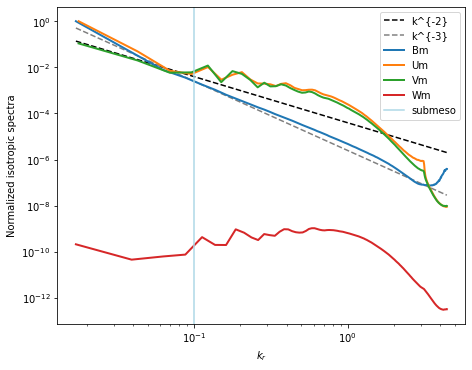

In [44]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(20, 5))
fig.tight_layout() # Or equivalently,  "plt.tight_layout()"

plt.subplot(131)
plt.loglog(B_spectra.freq_r*2*np.pi, 1e-6*B_spectra.freq_r**-2, '--',linewidth=1.5,color='black', label='k^{-2}')
plt.loglog(B_spectra.freq_r*2*np.pi, 1e-8*B_spectra.freq_r**-3, '--',linewidth=1.5,color='gray', label='k^{-3}')
plt.loglog(B_spectra.freq_r*2*np.pi, B_spectra/B_spectra[0],linewidth=2, label='Bm')
plt.loglog(U_spectra.freq_r*2*np.pi, U_spectra/U_spectra[0],linewidth=2, label='Um')
plt.loglog(V_spectra.freq_r*2*np.pi, V_spectra/U_spectra[0],linewidth=2, label='Vm')
plt.loglog(W_spectra.freq_r*2*np.pi, W_spectra/U_spectra[0], linewidth=2,label='Wm')
plt.axvline(x = 1e-1,linewidth=1.5, color='lightblue', label = 'submeso')

plt.legend()
plt.xlabel('$k_r$')
plt.ylabel('Normalized isotropic spectra')


# Isotropic Power Spectrum

In [47]:
# mesoscale spectra
Bm_spectra = xrft.isotropic_power_spectrum(Bm_MLD_lowres,dim=['lon','lat'], 
                                           detrend='linear', window=True).compute().mean('time')

Um_spectra = xrft.isotropic_power_spectrum(Um_MLD_lowres,dim=['lon','lat'], 
                                           detrend='linear', window=True).compute().mean('time')

Vm_spectra = xrft.isotropic_power_spectrum(Vm_MLD_lowres,dim=['lon','lat'], 
                                           detrend='linear', window=True).compute().mean('time')

Wm_spectra = xrft.isotropic_power_spectrum(Wm_MLD_lowres,dim=['lon','lat'], 
                                           detrend='linear', window=True).compute().mean('time')

/home/ab10313/.local/lib/python3.9/site-packages/xrft/xrft.py:47: FutureWarning: Please provide the name of window adhering to scipy.signal.windows. The boolean option will be deprecated in future releases.
  warnings.warn(
/home/ab10313/.local/lib/python3.9/site-packages/xrft/xrft.py:1025: FutureWarning: Isotropic wavenumber larger than the Nyquist wavenumber may result.
  warnings.warn(msg, FutureWarning)
/home/ab10313/.local/lib/python3.9/site-packages/xrft/xrft.py:47: FutureWarning: Please provide the name of window adhering to scipy.signal.windows. The boolean option will be deprecated in future releases.
  warnings.warn(
/home/ab10313/.local/lib/python3.9/site-packages/xrft/xrft.py:1025: FutureWarning: Isotropic wavenumber larger than the Nyquist wavenumber may result.
  warnings.warn(msg, FutureWarning)
/home/ab10313/.local/lib/python3.9/site-packages/xrft/xrft.py:47: FutureWarning: Please provide the name of window adhering to scipy.signal.windows. The boolean option will be de

In [48]:
# submesoscale fluxes spectra
UsBs_spectra = xrft.isotropic_power_spectrum(UsBs_MLD_lowres,dim=['lon','lat'], 
                                           detrend='linear', window=True).compute().mean('time')

VsBs_spectra = xrft.isotropic_power_spectrum(VsBs_MLD_lowres,dim=['lon','lat'], 
                                           detrend='linear', window=True).compute().mean('time')

WsBs_spectra = xrft.isotropic_power_spectrum(WsBs_MLD_lowres,dim=['lon','lat'], 
                                           detrend='linear', window=True).compute().mean('time')


/home/ab10313/.local/lib/python3.9/site-packages/xrft/xrft.py:47: FutureWarning: Please provide the name of window adhering to scipy.signal.windows. The boolean option will be deprecated in future releases.
  warnings.warn(
/home/ab10313/.local/lib/python3.9/site-packages/xrft/xrft.py:1025: FutureWarning: Isotropic wavenumber larger than the Nyquist wavenumber may result.
  warnings.warn(msg, FutureWarning)
/home/ab10313/.local/lib/python3.9/site-packages/xrft/xrft.py:47: FutureWarning: Please provide the name of window adhering to scipy.signal.windows. The boolean option will be deprecated in future releases.
  warnings.warn(
/home/ab10313/.local/lib/python3.9/site-packages/xrft/xrft.py:1025: FutureWarning: Isotropic wavenumber larger than the Nyquist wavenumber may result.
  warnings.warn(msg, FutureWarning)
/home/ab10313/.local/lib/python3.9/site-packages/xrft/xrft.py:47: FutureWarning: Please provide the name of window adhering to scipy.signal.windows. The boolean option will be de

Text(0.5, 0, '$k_r$')

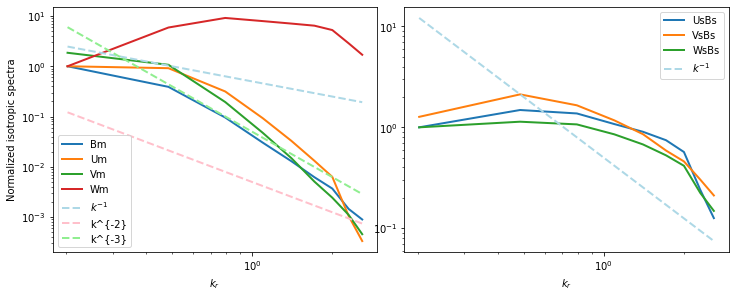

In [76]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))
fig.tight_layout() # Or equivalently,  "plt.tight_layout()"

plt.subplot(131)
plt.loglog(Bm_spectra.freq_r, Bm_spectra/Bm_spectra[0],linewidth=2, label='Bm')
plt.loglog(Um_spectra.freq_r, Um_spectra/Um_spectra[0],linewidth=2, label='Um')
plt.loglog(Vm_spectra.freq_r, Vm_spectra/Um_spectra[0],linewidth=2, label='Vm')
plt.loglog(Wm_spectra.freq_r, Wm_spectra/Wm_spectra[0], linewidth=2,label='Wm')
plt.plot(Bm_spectra.freq_r, 5e-1*Bm_spectra.freq_r**-1, '--',linewidth=2,color='lightblue', label='$k^{-1}$')
plt.plot(Bm_spectra.freq_r, 5e-3*Bm_spectra.freq_r**-2, '--',linewidth=2,color='pink', label='k^{-2}')
plt.plot(Bm_spectra.freq_r, 5e-2*Bm_spectra.freq_r**-3, '--',linewidth=2,color='lightgreen', label='k^{-3}')
plt.legend()
plt.xlabel('$k_r$')
plt.ylabel('Normalized isotropic spectra')


plt.subplot(132)
plt.loglog(UsBs_spectra.freq_r, UsBs_spectra/UsBs_spectra[0],linewidth=2, label='UsBs')
plt.loglog(VsBs_spectra.freq_r, VsBs_spectra/UsBs_spectra[0],linewidth=2, label='VsBs')
plt.loglog(WsBs_spectra.freq_r, WsBs_spectra/WsBs_spectra[0],linewidth=2, label='WsBs')
plt.plot(Bm_spectra.freq_r, 5e-1*Bm_spectra.freq_r**-2, '--',linewidth=2,color='lightblue', label='$k^{-1}$')
#plt.plot(Bm_spectra.freq_r, 5e-1*Bm_spectra.freq_r**-2, '--',linewidth=2,color='pink', label='k^{-2}')
#plt.plot(Bm_spectra.freq_r, 5e-2*Bm_spectra.freq_r**-3, '--',linewidth=2,color='lightgreen', label='k^{-3}')
plt.legend()
plt.xlabel('$k_r$')
#plt.ylabel('Normalized isotropic spectra')